In [10]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6fa4c1c6-2c35-4409-891e-453235f1bb06',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-13T12:15:20.388Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8818}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10552, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [11]:
type(data)

dict

In [12]:
import pandas as pd


#See all the columnsinstead of just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Normalizing the data and beautify it in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Lim Otto\AppData\Local\Temp\ipykernel_12520\1221258735.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954116e+07,1.954116e+07,False,NaN,1,NaN,NaN,None,2023-11-13T11:48:00.000Z,36816.007708,1.382994e+10,8.3933,-0.483478,-0.760451,4.539917,37.091068,39.668985,25.462405,7.194273e+11,51.1644,7.731362e+11,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
1,1027,Ethereum,ETH,ethereum,7769,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202603e+08,1.202603e+08,True,NaN,2,NaN,NaN,None,2023-11-13T11:48:00.000Z,2045.247718,9.692297e+09,9.3626,-0.583195,-0.398087,7.788994,32.303074,26.023523,11.245487,2.459621e+11,17.4879,2.459621e+11,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
2,825,Tether USDt,USDT,tether,65613,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.680446e+10,9.062366e+10,True,NaN,3,NaN,NaN,None,2023-11-13T11:47:00.000Z,1.000340,3.666275e+10,-5.0598,-0.011142,0.022857,-0.019528,0.035547,0.038586,0.176166,8.683394e+10,6.1779,9.065444e+10,None,2023-11-13T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-13 11:51:27.360583
3,1839,BNB,BNB,bnb,1757,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517016e+08,1.517016e+08,False,NaN,4,NaN,NaN,None,2023-11-13T11:47:00.000Z,244.633018,7.556078e+08,-15.9631,-0.765521,-2.022621,-0.185078,18.814086,15.256761,2.479440,3.711122e+10,2.6403,3.711122e+10,None,2023-11-13T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
4,52,XRP,XRP,xrp,1140,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,None,2023-11-13T11:48:00.000Z,0.648940,1.034786e+09,-18.4866,-0.896990,-2.818772,-6.962331,33.587379,34.652193,3.636579,3.481745e+10,2.4755,6.489404e+10,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
5,3408,USDC,USDC,usd-coin,14908,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.422564e+10,2.422564e+10,False,NaN,6,NaN,NaN,None,2023-11-13T11:47:00.000Z,0.999875,4.137550e+09,10.6107,-0.007818,0.015381,-0.022072,-0.028443,-0.021077,-0.007728,2.422261e+10,1.7227,2.422261e+10,None,2023-11-13T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-13 11:51:27.360583
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.221649e+08,5.622912e+08,True,NaN,7,NaN,NaN,None,2023-11-13T11:48:00.000Z,56.757016,2.383300e+09,-49.3820,-1.746255,-6.075520,40.502759,158.632937,201.369775,127.812436,2.396082e+10,1.7036,3.191397e+10,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.526851e+10,3.635027e+10,False,NaN,8,NaN,NaN,None,2023-11-13T11:47:00.000Z,0.366330,3.677986e+08,-29.9571,-2.039073,-5.856897,3.883351,48.723537,47.844593,26.817617,1.291991e+10,0.9192,1.648485e+10,None,2023-11-13T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583
8,74,Dogecoin,DOGE,dogecoin,822,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6fa4c1c6-2c35-4409-891e-453235f1bb06',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [9]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [14]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954116e+07,1.954116e+07,False,NaN,1,NaN,NaN,None,2023-11-13T11:48:00.000Z,36816.007708,1.382994e+10,8.3933,-0.483478,-0.760451,4.539917,37.091068,39.668985,25.462405,7.194273e+11,51.1644,7.731362e+11,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
1,1027,Ethereum,ETH,ethereum,7769,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202603e+08,1.202603e+08,True,NaN,2,NaN,NaN,None,2023-11-13T11:48:00.000Z,2045.247718,9.692297e+09,9.3626,-0.583195,-0.398087,7.788994,32.303074,26.023523,11.245487,2.459621e+11,17.4879,2.459621e+11,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
2,825,Tether USDt,USDT,tether,65613,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.680446e+10,9.062366e+10,True,NaN,3,NaN,NaN,None,2023-11-13T11:47:00.000Z,1.000340,3.666275e+10,-5.0598,-0.011142,0.022857,-0.019528,0.035547,0.038586,0.176166,8.683394e+10,6.1779,9.065444e+10,None,2023-11-13T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-13 11:51:27.360583,NaT
3,1839,BNB,BNB,bnb,1757,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517016e+08,1.517016e+08,False,NaN,4,NaN,NaN,None,2023-11-13T11:47:00.000Z,244.633018,7.556078e+08,-15.9631,-0.765521,-2.022621,-0.185078,18.814086,15.256761,2.479440,3.711122e+10,2.6403,3.711122e+10,None,2023-11-13T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
4,52,XRP,XRP,xrp,1140,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,False,NaN,5,NaN,NaN,None,2023-11-13T11:48:00.000Z,0.648940,1.034786e+09,-18.4866,-0.896990,-2.818772,-6.962331,33.587379,34.652193,3.636579,3.481745e+10,2.4755,6.489404e+10,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
5,3408,USDC,USDC,usd-coin,14908,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.422564e+10,2.422564e+10,False,NaN,6,NaN,NaN,None,2023-11-13T11:47:00.000Z,0.999875,4.137550e+09,10.6107,-0.007818,0.015381,-0.022072,-0.028443,-0.021077,-0.007728,2.422261e+10,1.7227,2.422261e+10,None,2023-11-13T11:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-13 11:51:27.360583,NaT
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.221649e+08,5.622912e+08,True,NaN,7,NaN,NaN,None,2023-11-13T11:48:00.000Z,56.757016,2.383300e+09,-49.3820,-1.746255,-6.075520,40.502759,158.632937,201.369775,127.812436,2.396082e+10,1.7036,3.191397e+10,None,2023-11-13T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.526851e+10,3.635027e+10,False,NaN,8,NaN,NaN,None,2023-11-13T11:47:00.000Z,0.366330,3.677986e+08,-29.9571,-2.039073,-5.856897,3.883351,48.723537,47.844593,26.817617,1.291991e+10,0.9192,1.648485e+10,None,2023-11-13T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-13 11:51:27.360583,NaT
8,74,Dogecoin,DOGE,dogecoin,822,2013-12-15T00:00:00.000Z,"[mineable

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.48348,-0.76045,4.53992,37.09107,39.66898,25.46241
Ethereum,-0.58320,-0.39809,7.78899,32.30307,26.02352,11.24549
Tether USDt,-0.01114,0.02286,-0.01953,0.03555,0.03859,0.17617
BNB,-0.76552,-2.02262,-0.18508,18.81409,15.25676,2.47944
XRP,-0.89699,-2.81877,-6.96233,33.58738,34.65219,3.63658
USDC,-0.00782,0.01538,-0.02207,-0.02844,-0.02108,-0.00773
Solana,-1.74626,-6.07552,40.50276,158.63294,201.36977,127.81244
Cardano,-2.03907,-5.85690,3.88335,48.72354,47.84459,26.81762
Dogecoin,-1.53422,-3.00894,6.24418,31.41355,25.46445,4.11664


In [17]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.48348
             quote.USD.percent_change_24h    -0.76045
             quote.USD.percent_change_7d      4.53992
             quote.USD.percent_change_30d    37.09107
             quote.USD.percent_change_60d    39.66898
             quote.USD.percent_change_90d    25.46241
Ethereum     quote.USD.percent_change_1h     -0.58320
             quote.USD.percent_change_24h    -0.39809
             quote.USD.percent_change_7d      7.78899
             quote.USD.percent_change_30d    32.30307
             quote.USD.percent_change_60d    26.02352
             quote.USD.percent_change_90d    11.24549
Tether USDt  quote.USD.percent_change_1h     -0.01114
             quote.USD.percent_change_24h     0.02286
             quote.USD.percent_change_7d     -0.01953
             quote.USD.percent_change_30d     0.03555
             quote.USD.percent_change_60d     0.03859
             quote.USD.percent_change_90

In [18]:
type(df4)

pandas.core.series.Series

In [19]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.48348
            quote.USD.percent_change_24h  -0.76045
            quote.USD.percent_change_7d    4.53992
            quote.USD.percent_change_30d  37.09107
            quote.USD.percent_change_60d  39.66898
            quote.USD.percent_change_90d  25.46241
Ethereum    quote.USD.percent_change_1h   -0.58320
            quote.USD.percent_change_24h  -0.39809
            quote.USD.percent_change_7d    7.78899
            quote.USD.percent_change_30d  32.30307
            quote.USD.percent_change_60d  26.02352
            quote.USD.percent_change_90d  11.24549
Tether USDt quote.USD.percent_change_1h   -0.01114
            quote.USD.percent_change_24h   0.02286
            quote.USD.percent_change_7d   -0.01953
            quote.USD.percent_change_30d   0.03555
            quote.USD.percent_change_60d   0.03859
            quote.USD.percent_change_90d   0.17617
BNB         quote.USD.percent_change_1h   -0.76552
            quote.USD.percent_change_24h  -2.02262
            quote.USD.percent_change_7d   -0.18508
            quote.USD.percent_change_30d  18.81409
            quote.USD.percent_change_60d  15.25676
            quote.USD.percent_change_90d   2.47944
XRP         quote.USD.percent_change_1h   -0.89699
            quote.USD.percent_change_24h  -2.81877
            quote.USD.percent_change_7d   -6.96233
            quote.USD.percent_change_30d  33.58738
            quote.USD.percent_change_60d  34.65219
            quote.USD.percent_change_90d   3.63658
USDC        quote.USD.percent_change_1h   -0.00782
            quote.USD.percent_change_24h   0.01538
            quote.USD.percent_change_7d   -0.02207
            quote.USD.percent_change_30d  -0.02844
            quote.USD.percent_change_60d  -0.02108
            quote.USD.percent_change_90d  -0.00773
Solana      quote.USD.percent_change_1h   -1.74626
            quote.USD.percent_change_24h  -6.07552
            quote.USD.percent_change_7d   40.50276
            quote.USD.percent_change_30d 158.63294
            quote.USD.percent_change_60d 201.36977
            quote.USD.percent_change_90d 127.81244
Cardano     quote.USD.percent_change_1h   -2.03907
            quote.USD.percent_change_24h  -5.85690
            quote.USD.percent_change_7d    3.88335
            quote.USD.percent_change_30d  48.72354
            quote.USD.percent_change_60d  47.84459
            quote.USD.percent_change_90d  26.81762
Dogecoin    quote.USD.percent_change_1h   -1.53422
            quote.USD.percent_change_24h  -3.00894
            quote.USD.percent_change_7d    6.24418
            quote.USD.percent_change_30d  31.41355
            quote.USD.percent_change_60d  25.46445
            quote.USD.percent_change_90d   4.11664
TRON        quote.USD.percent_change_1h   -0.80763
            quote.USD.percent_change_24h   1.22829
            quote.USD.percent_change_7d   12.09201
            quote.USD.percent_change_30d  28.61056
            quote.USD.percent_change_60d  34.96140
            quote.USD.percent_change_90d  42.16065
Chainlink   quote.USD.percent_change_1h   -1.76220
            quote.USD.percent_change_24h  -6.74723
            quote.USD.percent_change_7d   19.66809
            quote.USD.percent_change_30d 107.62512
            quote.USD.percent_change_60d 149.21425
            quote.USD.percent_change_90d 106.44578
Toncoin     quote.USD.percent_change_1h   -1.35465
            quote.USD.percent_change_24h  -0.41006
            quote.USD.percent_change_7d    4.89133
            quote.USD.percent_change_30d  23.99554
            quote.USD.percent_change_60d  27.87664
            quote.USD.percent_change_90d  64.65560
Polygon     quote.USD.percent_change_1h   -1.38537
            quote.USD.percent_change_24h   3.47582
            quote.USD.percent_change_7d   21.84103
            quote.USD.percent_change_30d  67.49784
            quote.USD.percent_change_60d  67.02780
            quo

In [20]:
df5.count()

values    90
dtype: int64

In [30]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48348
1,Bitcoin,quote.USD.percent_change_24h,-0.76045
2,Bitcoin,quote.USD.percent_change_7d,4.53992
3,Bitcoin,quote.USD.percent_change_30d,37.09107
4,Bitcoin,quote.USD.percent_change_60d,39.66898
5,Bitcoin,quote.USD.percent_change_90d,25.46241
6,Ethereum,quote.USD.percent_change_1h,-0.58320
7,Ethereum,quote.USD.percent_change_24h,-0.39809
8,Ethereum,quote.USD.percent_change_7d,7.78899
9,Ethereum,quote.USD.percent_change_30d,32.30307


In [31]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48348
1,Bitcoin,quote.USD.percent_change_24h,-0.76045
2,Bitcoin,quote.USD.percent_change_7d,4.53992
3,Bitcoin,quote.USD.percent_change_30d,37.09107
4,Bitcoin,quote.USD.percent_change_60d,39.66898
5,Bitcoin,quote.USD.percent_change_90d,25.46241
6,Ethereum,quote.USD.percent_change_1h,-0.58320
7,Ethereum,quote.USD.percent_change_24h,-0.39809
8,Ethereum,quote.USD.percent_change_7d,7.78899
9,Ethereum,quote.USD.percent_change_30d,32.30307


In [32]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48348
1,Bitcoin,24h,-0.76045
2,Bitcoin,7d,4.53992
3,Bitcoin,30d,37.09107
4,Bitcoin,60d,39.66898
5,Bitcoin,90d,25.46241
6,Ethereum,quote.USD.percent_change_1h,-0.58320
7,Ethereum,24h,-0.39809
8,Ethereum,7d,7.78899
9,Ethereum,30d,32.30307


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

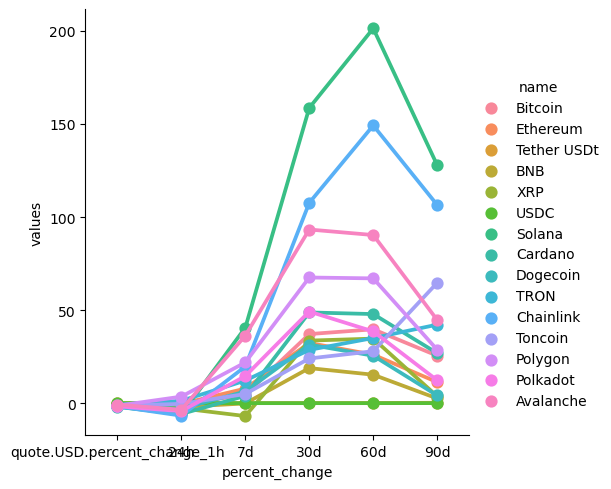

In [34]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [35]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,36816.00771,2023-11-13 11:51:27.360583
0,Bitcoin,36816.00771,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

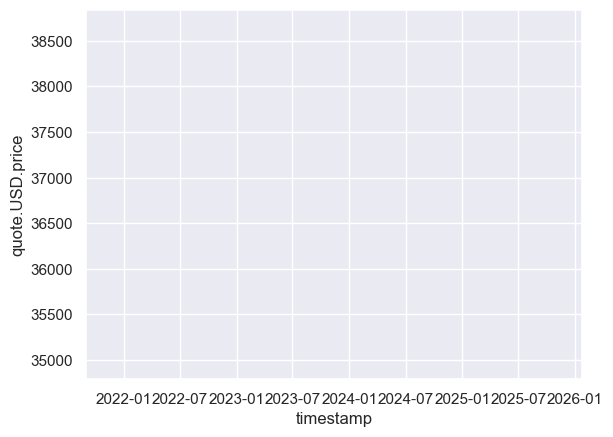

In [38]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)